# Testing of Model

In [ ]:
# directory of test set
test_dir = '/content/drive/MyDrive/2023_internship/dataset_20200803/testing_flir2'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 174 files belonging to 15 classes.


In [ ]:
import tensorflow as tf
import numpy as np

model = keras.models.load_model("/content/drive/MyDrive/flir_model_0.keras")
# Initialize lists to hold images and labels
test_images = []
test_labels = []

# Iterate through the test_ds dataset
for images, labels in test_ds:
    # Iterate through the batch of images and labels
    for img_array, label in zip(images, labels):
        test_images.append(img_array.numpy())  # Convert tensor to numpy array
        test_labels.append(label.numpy())

# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Results Presentation

1/1 [==============================] - 0s 21ms/step


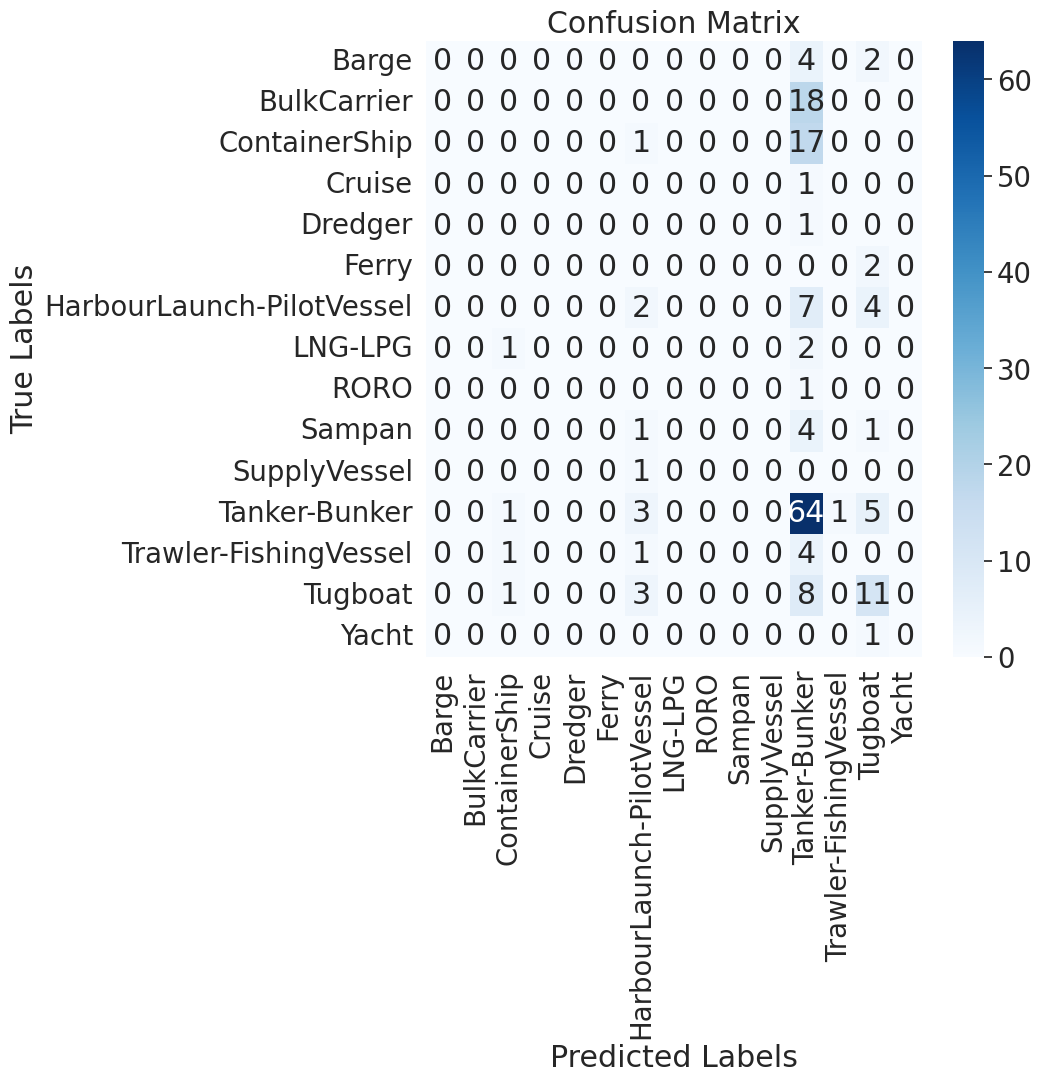

In [ ]:
import os
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an array to hold the predicted labels
predicted_labels = []

# Initialize an array to hold the true labels
true_labels = []

class_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]



# Iterate through test images and predict labels
for i in range(len(test_images)):
    img_array = tf.expand_dims(test_images[i], 0)
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions[0])
    predicted_labels.append(predicted_label)
    true_labels.append(np.where(class_names == test_labels[i])[0][0])

#print(true_labels)
# Convert the lists to arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=ship_categories, yticklabels=ship_categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

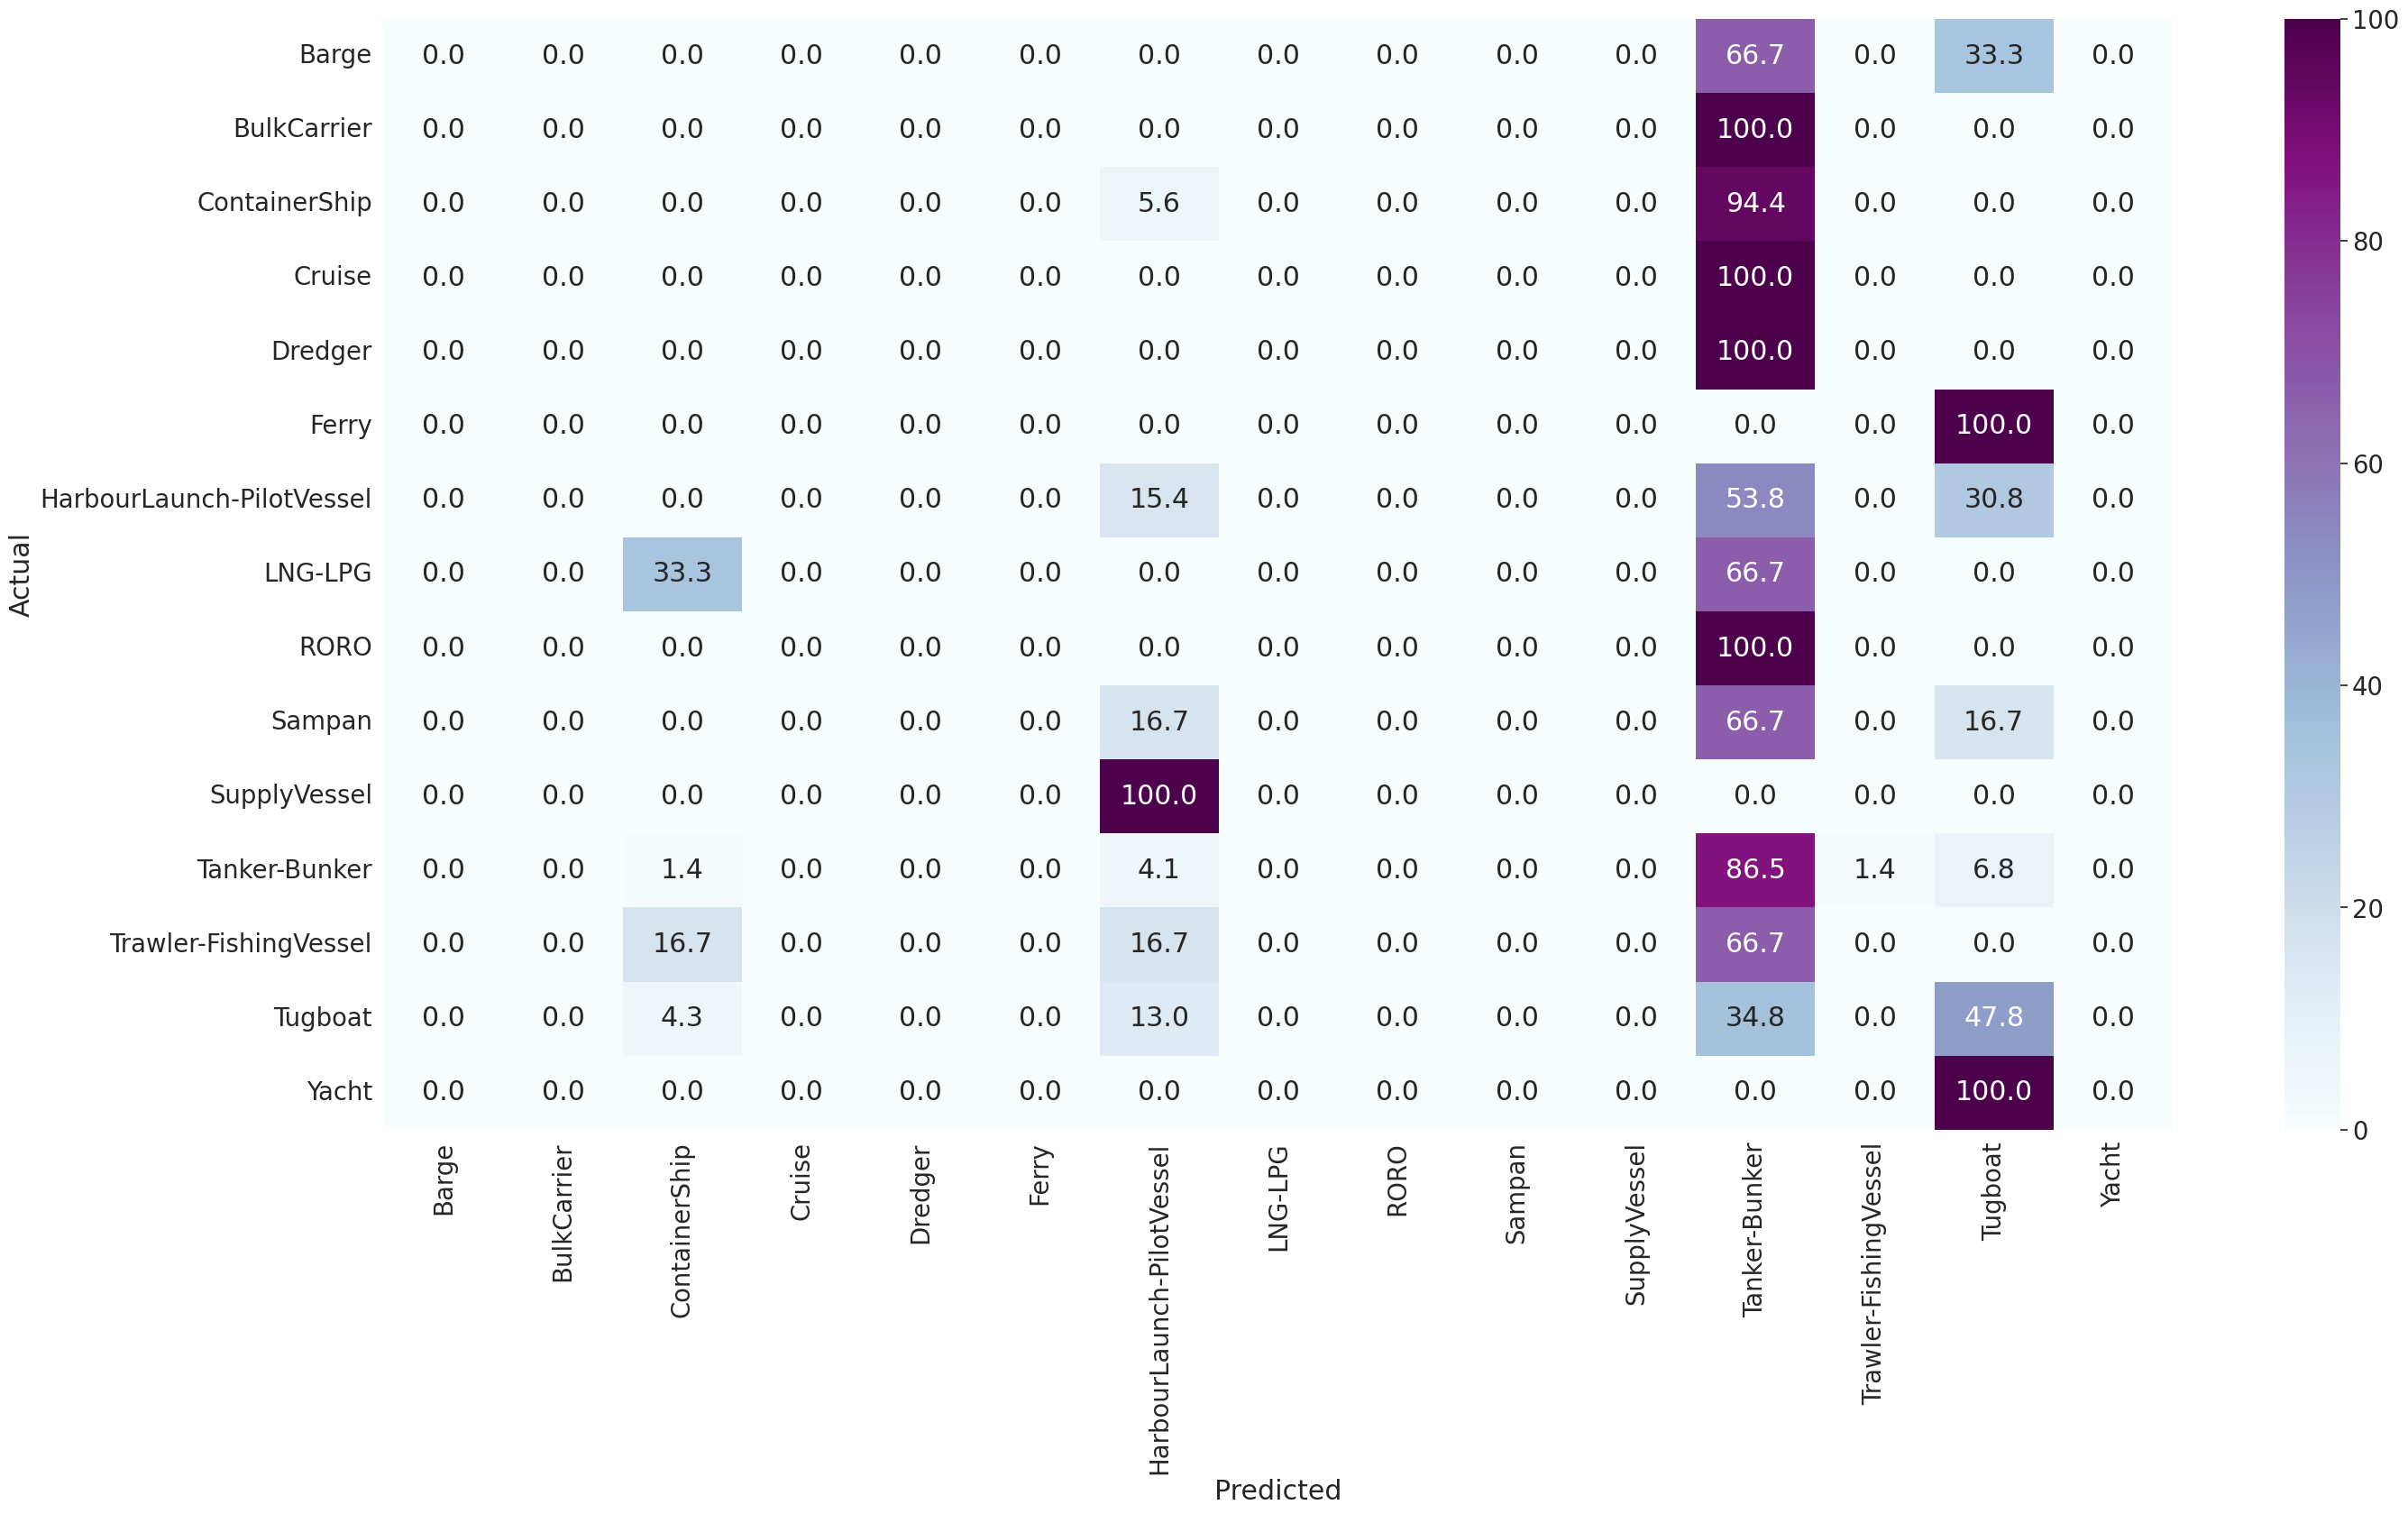

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
sns.set(font_scale=1.8)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(32,16))
sns.heatmap(cmn*100, annot=True, fmt='.1f', cmap="BuPu", xticklabels=ship_categories, yticklabels=ship_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
# Evaluate the restored model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('Model with original flir images, accuracy: {:5.2f}%'.format(100 * acc))

print(model.predict(test_images).shape)

6/6 - 0s - loss: 1.7424 - accuracy: 0.4425 - 321ms/epoch - 54ms/step
Model with original flir images, accuracy: 44.25%
6/6 [==============================] - 0s 12ms/step
(174, 15)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Calculate TP, TN, FP, FN from the confusion matrix
tp = np.diag(confusion)
fp = np.sum(confusion, axis=0) - tp
fn = np.sum(confusion, axis=1) - tp
tn = np.sum(confusion) - (tp + fp + fn)

# Calculate and print F1 score, precision, and recall
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("\nF1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


F1 Score: 0.33684717621278953
Precision: 0.27615004398368437
Recall: 0.4425287356321839


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Confusion Matrix:")
print("{:<30} {:<8} {:<8} {:<8} {:<8}".format("Class", "TP", "TN", "FP", "FN"))
for i, class_name in enumerate(class_names):
    print("{:<30} {:<8} {:<8} {:<8} {:<8}".format(ship_dict[class_name], tp[i], tn[i], fp[i], fn[i]))


Confusion Matrix:
Class                          TP       TN       FP       FN      
Barge                          0        168      0        6       
BulkCarrier                    0        156      0        18      
ContainerShip                  0        152      4        18      
Cruise                         0        173      0        1       
Dredger                        0        173      0        1       
Ferry                          0        172      0        2       
HarbourLaunch-PilotVessel      2        151      10       11      
LNG-LPG                        0        171      0        3       
RORO                           0        173      0        1       
Sampan                         0        168      0        6       
SupplyVessel                   0        173      0        1       
Tanker-Bunker                  64       33       67       10      
Trawler-FishingVessel          0        167      1        6       
Tugboat                        11       136 